<font size="5">Jacob Phillips: Buyer   

<font size="2">
Unlimited Budget, 4+ bathrooms or smaller house nearby, big lot (tennis court & pool), golf, historic, no waterfront                                                            


<font size="5">Setup and Import

In [332]:
import pandas as pd
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [333]:
#import the data from a csv-file
df_house = pd.read_csv("data/eda.csv")

In [334]:
df_house.head()

,date,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,7129300520,1,7129300520,3.0,1.00,1180.0,5650.0,1.0,...,7,1180.0,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0
1,2014-12-09,538000.0,6414100192,2,6414100192,3.0,2.25,2570.0,7242.0,2.0,...,7,2170.0,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0
2,2015-02-25,180000.0,5631500400,3,5631500400,2.0,1.00,770.0,10000.0,1.0,...,6,770.0,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0
3,2014-12-09,604000.0,2487200875,4,2487200875,4.0,3.00,1960.0,5000.0,1.0,...,7,1050.0,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0
4,2015-02-18,510000.0,1954400510,5,1954400510,3.0,2.00,1680.0,8080.0,1.0,...,8,1680.0,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0


In [335]:
#df_house['waterfront']
df_house['waterfront'].unique()

array([nan,  0.,  1.])

In [336]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   id.1           21597 non-null  int64  
 5   bedrooms       21597 non-null  float64
 6   bathrooms      21597 non-null  float64
 7   sqft_living    21597 non-null  float64
 8   sqft_lot       21597 non-null  float64
 9   floors         21597 non-null  float64
 10  waterfront     19206 non-null  float64
 11  view           21534 non-null  float64
 12  condition      21597 non-null  int64  
 13  grade          21597 non-null  int64  
 14  sqft_above     21597 non-null  float64
 15  sqft_basement  21145 non-null  float64
 16  yr_built       21597 non-null  int64  
 17  yr_renovated   17749 non-null  float64
 18  zipcod

<font size="10">Data cleaning

In [337]:
# import missingno
import missingno as msno

<Axes: >

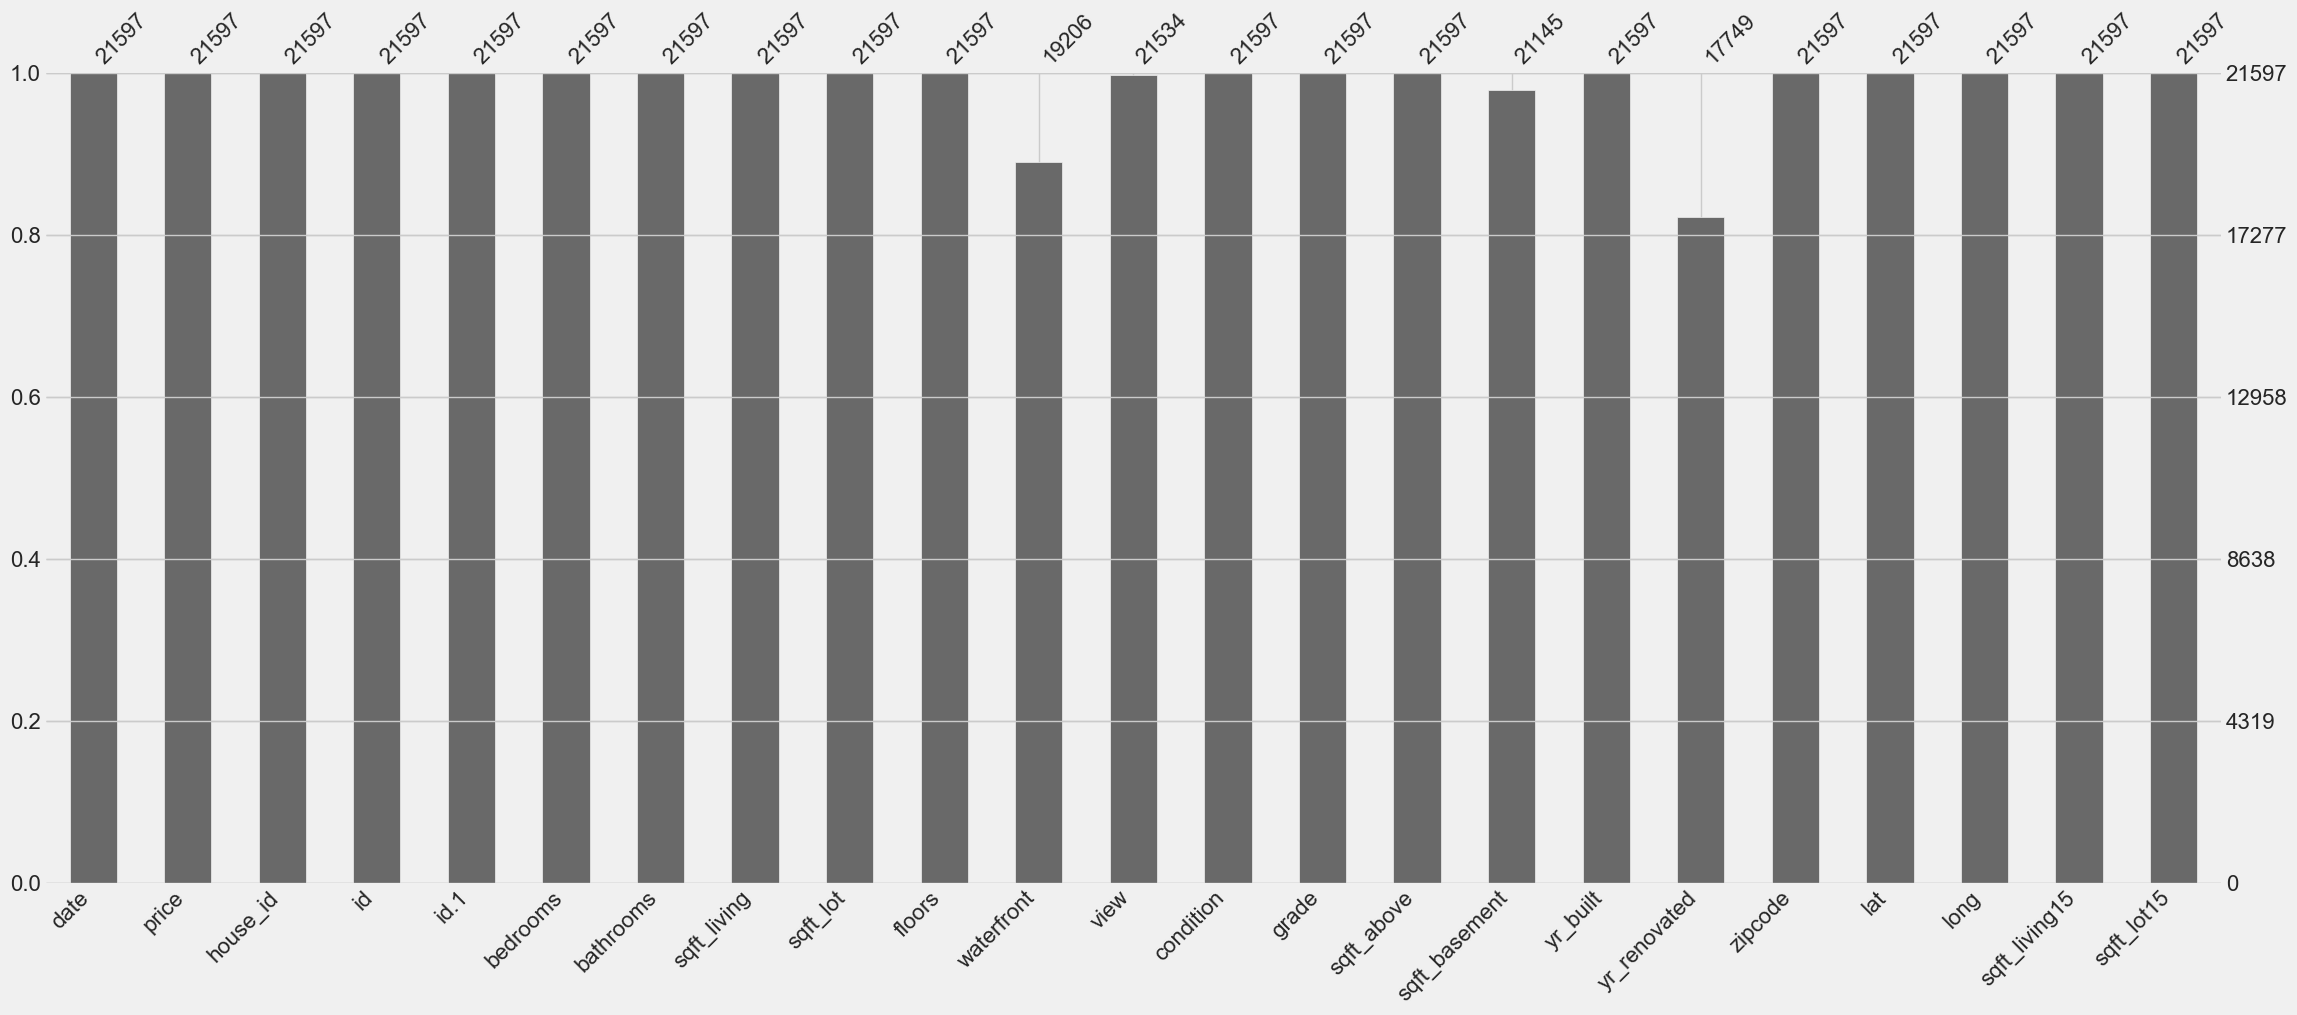

In [338]:
# plotting percentage of missing values per column
msno.bar(df_house)

In [339]:
df_house.isna().sum()

date                0
price               0
house_id            0
id                  0
id.1                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

<Axes: >

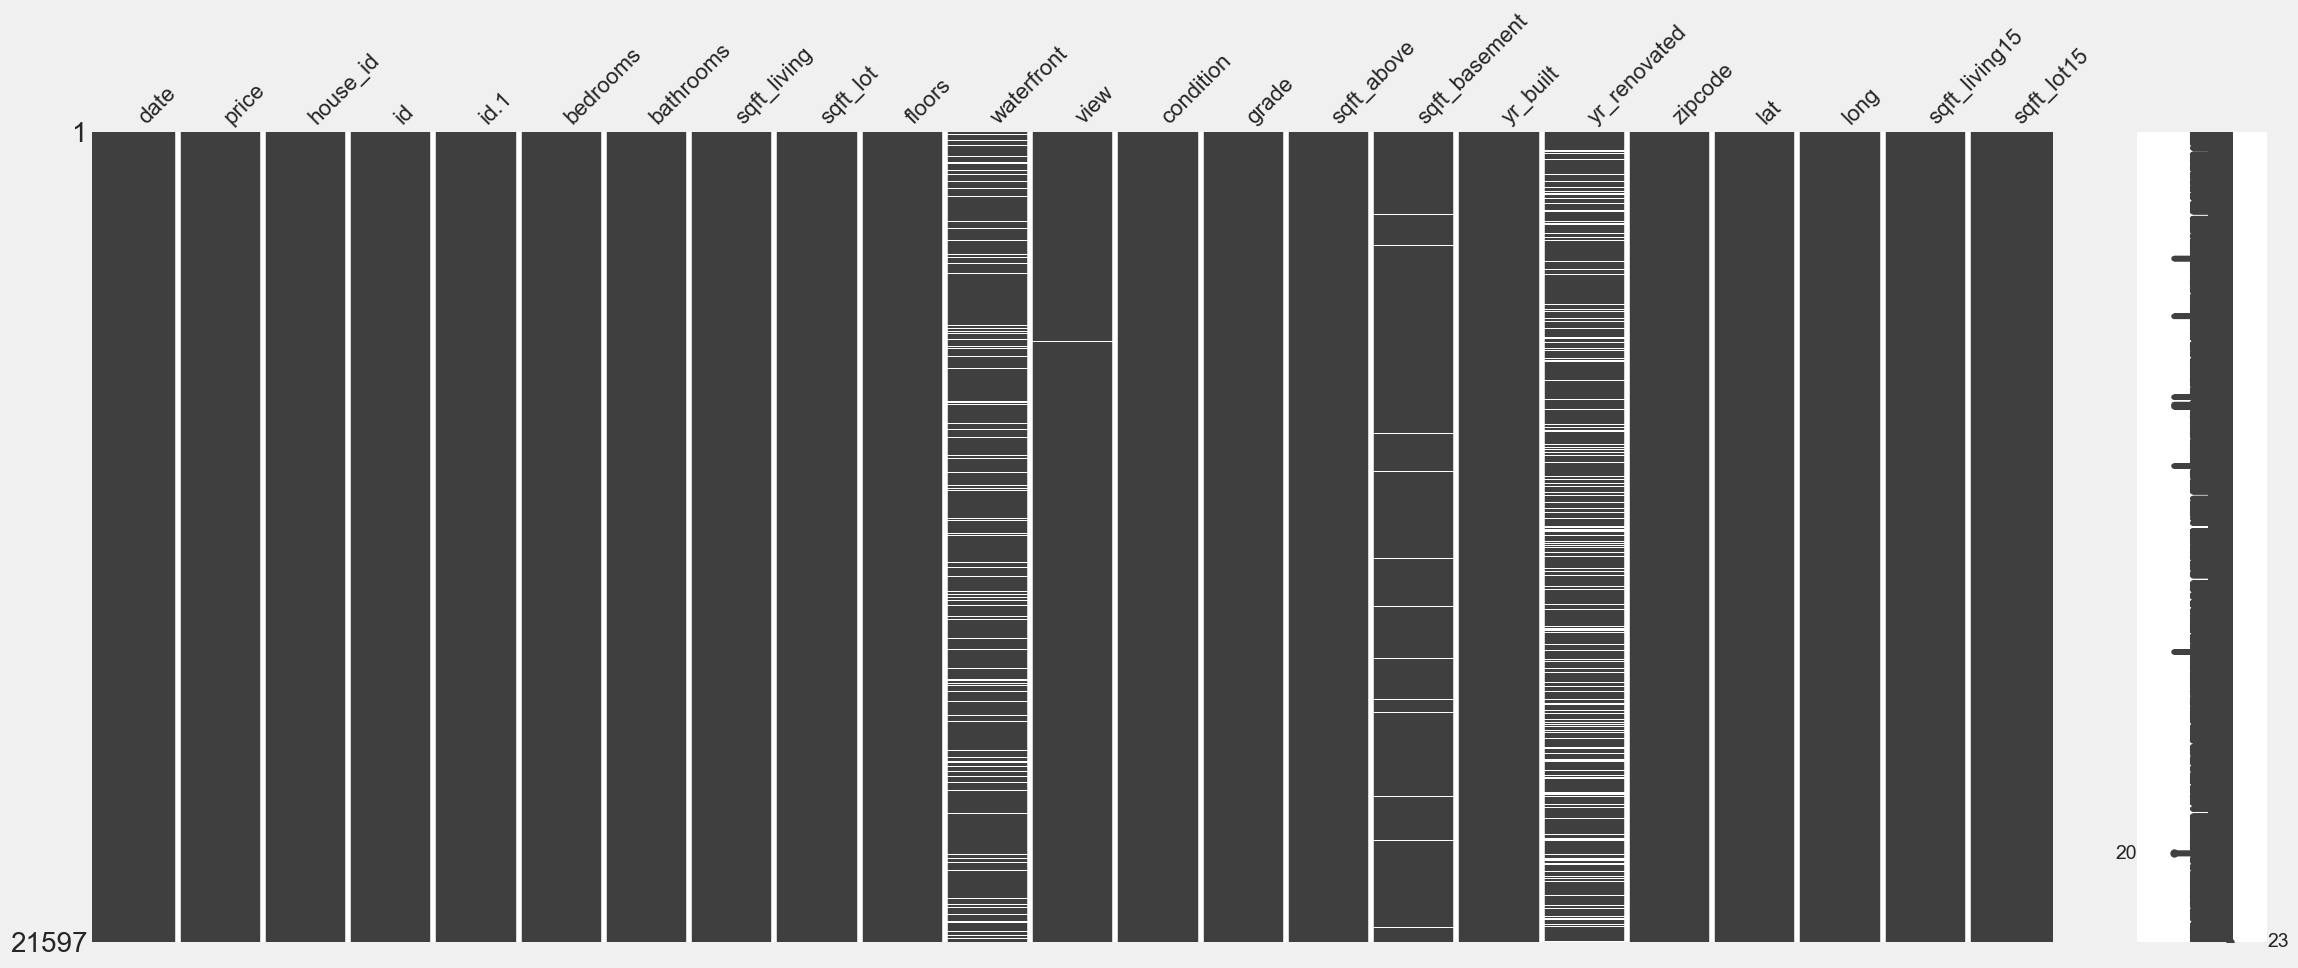

In [340]:
msno.matrix(df_house)

In [341]:
df_house.columns

Index(['date', 'price', 'house_id', 'id', 'id.1', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [342]:
# replacing empty spaces with underscores in column names
df_house.columns = df_house.columns.str.replace('.','_')
df_house= df_house.rename({'lat':'latitude','long':'longitude', 
                           'sqft_living15':'living_space_15_neighbors', 'sqft_lot15':'plotsize_15_neighbors',
                           'sqft_living':'livingspace_sqft', 'sqft_lot':'plotsize_sqft',
                           'view':'num_potential_buyers',
                           },axis=1)
df_house.columns

Index(['date', 'price', 'house_id', 'id', 'id_1', 'bedrooms', 'bathrooms',
       'livingspace_sqft', 'plotsize_sqft', 'floors', 'waterfront',
       'num_potential_buyers', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'latitude',
       'longitude', 'living_space_15_neighbors', 'plotsize_15_neighbors'],
      dtype='object')

- **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
- **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [343]:
# check how many duplicated rows exist in the data frame
df_house.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [344]:
# check data types in data frame
df_house.dtypes

date                          object
price                        float64
house_id                       int64
id                             int64
id_1                           int64
bedrooms                     float64
bathrooms                    float64
livingspace_sqft             float64
plotsize_sqft                float64
floors                       float64
waterfront                   float64
num_potential_buyers         float64
condition                      int64
grade                          int64
sqft_above                   float64
sqft_basement                float64
yr_built                       int64
yr_renovated                 float64
zipcode                        int64
latitude                     float64
longitude                    float64
living_space_15_neighbors    float64
plotsize_15_neighbors        float64
dtype: object

In [345]:
# change data type to float - This won't work if one of them isn't the type
df_house = df_house.astype({'price': float})
df_house = df_house.astype({'house_id': int})
df_house = df_house.astype({'id': int})
df_house = df_house.astype({'id_1': int})
df_house = df_house.astype({'bedrooms': float})
df_house = df_house.astype({'bathrooms': float})
df_house = df_house.astype({'livingspace_sqft': float})
df_house = df_house.astype({'plotsize_sqft' : float})
df_house = df_house.astype({'floors': float})
df_house = df_house.astype({'num_potential_buyers': float})
df_house = df_house.astype({'condition': int})
df_house = df_house.astype({'grade': int})
df_house = df_house.astype({'sqft_above': float})
df_house = df_house.astype({'sqft_basement': float})
df_house = df_house.astype({'yr_built': int})
df_house = df_house.astype({'yr_renovated': float})
df_house = df_house.astype({'zipcode': float})
df_house = df_house.astype({'latitude': float})
df_house = df_house.astype({'longitude': float})
df_house = df_house.astype({'living_space_15_neighbors': float})
df_house = df_house.astype({'plotsize_15_neighbors': float})

In [346]:
df_house.head()

,date,price,house_id,id,id_1,bedrooms,bathrooms,livingspace_sqft,plotsize_sqft,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,living_space_15_neighbors,plotsize_15_neighbors
0,2014-10-13,221900.0,7129300520,1,7129300520,3.0,1.00,1180.0,5650.0,1.0,...,7,1180.0,0.0,1955,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,2014-12-09,538000.0,6414100192,2,6414100192,3.0,2.25,2570.0,7242.0,2.0,...,7,2170.0,400.0,1951,19910.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,2015-02-25,180000.0,5631500400,3,5631500400,2.0,1.00,770.0,10000.0,1.0,...,6,770.0,0.0,1933,NaN,98028.0,47.7379,-122.233,2720.0,8062.0
3,2014-12-09,604000.0,2487200875,4,2487200875,4.0,3.00,1960.0,5000.0,1.0,...,7,1050.0,910.0,1965,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,2015-02-18,510000.0,1954400510,5,1954400510,3.0,2.00,1680.0,8080.0,1.0,...,8,1680.0,0.0,1987,0.0,98074.0,47.6168,-122.045,1800.0,7503.0


In [347]:
# Use fillna to impute missing values
df_house["waterfront"] = df_house.waterfront.fillna(0)

# Replace missing values in "sqft_basement" with values from "sqft_living"
df_house['sqft_basement'].fillna(df_house['livingspace_sqft'], inplace=True)

# turn yr_built and yr_renovated into year datetime
df_house['yr_renovated'] = df_house['yr_renovated'].astype(str).apply(lambda x: x.replace('0.0',''))
df_house['yr_renovated'] = pd.to_datetime(df_house.yr_renovated).dt.strftime('%Y')
df_house["yr_renovated"] = df_house.yr_renovated.fillna(0)

df_house['yr_built'] = df_house['yr_built'].astype(str).apply(lambda x: x.replace('0.0',''))
df_house['yr_built'] = pd.to_datetime(df_house.yr_built).dt.strftime('%Y')

# Fill potential_buyers with 0
df_house["num_potential_buyers"] = df_house.num_potential_buyers.fillna(0)

In [348]:
# Rounding bathrooms and floors
df_house['bathrooms'] = df_house.bathrooms.round()
df_house['floors'] = df_house.floors.round()


In [349]:
df_house.head()

,date,price,house_id,id,id_1,bedrooms,bathrooms,livingspace_sqft,plotsize_sqft,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,living_space_15_neighbors,plotsize_15_neighbors
0,2014-10-13,221900.0,7129300520,1,7129300520,3.0,1.0,1180.0,5650.0,1.0,...,7,1180.0,0.0,1955,0,98178.0,47.5112,-122.257,1340.0,5650.0
1,2014-12-09,538000.0,6414100192,2,6414100192,3.0,2.0,2570.0,7242.0,2.0,...,7,2170.0,400.0,1951,1991,98125.0,47.7210,-122.319,1690.0,7639.0
2,2015-02-25,180000.0,5631500400,3,5631500400,2.0,1.0,770.0,10000.0,1.0,...,6,770.0,0.0,1933,0,98028.0,47.7379,-122.233,2720.0,8062.0
3,2014-12-09,604000.0,2487200875,4,2487200875,4.0,3.0,1960.0,5000.0,1.0,...,7,1050.0,910.0,1965,0,98136.0,47.5208,-122.393,1360.0,5000.0
4,2015-02-18,510000.0,1954400510,5,1954400510,3.0,2.0,1680.0,8080.0,1.0,...,8,1680.0,0.0,1987,0,98074.0,47.6168,-122.045,1800.0,7503.0


In [350]:
df_house.tail()

,date,price,house_id,id,id_1,bedrooms,bathrooms,livingspace_sqft,plotsize_sqft,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,latitude,longitude,living_space_15_neighbors,plotsize_15_neighbors
21592,2014-05-21,360000.0,263000018,21593,263000018,3.0,2.0,1530.0,1131.0,3.0,...,8,1530.0,0.0,2009,0,98103.0,47.6993,-122.346,1530.0,1509.0
21593,2015-02-23,400000.0,6600060120,21594,6600060120,4.0,2.0,2310.0,5813.0,2.0,...,8,2310.0,0.0,2014,0,98146.0,47.5107,-122.362,1830.0,7200.0
21594,2014-06-23,402101.0,1523300141,21595,1523300141,2.0,1.0,1020.0,1350.0,2.0,...,7,1020.0,0.0,2009,0,98144.0,47.5944,-122.299,1020.0,2007.0
21595,2015-01-16,400000.0,291310100,21596,291310100,3.0,2.0,1600.0,2388.0,2.0,...,8,1600.0,0.0,2004,0,98027.0,47.5345,-122.069,1410.0,1287.0
21596,2014-10-15,325000.0,1523300157,21597,1523300157,2.0,1.0,1020.0,1076.0,2.0,...,7,1020.0,0.0,2008,0,98144.0,47.5941,-122.299,1020.0,1357.0


<Axes: >

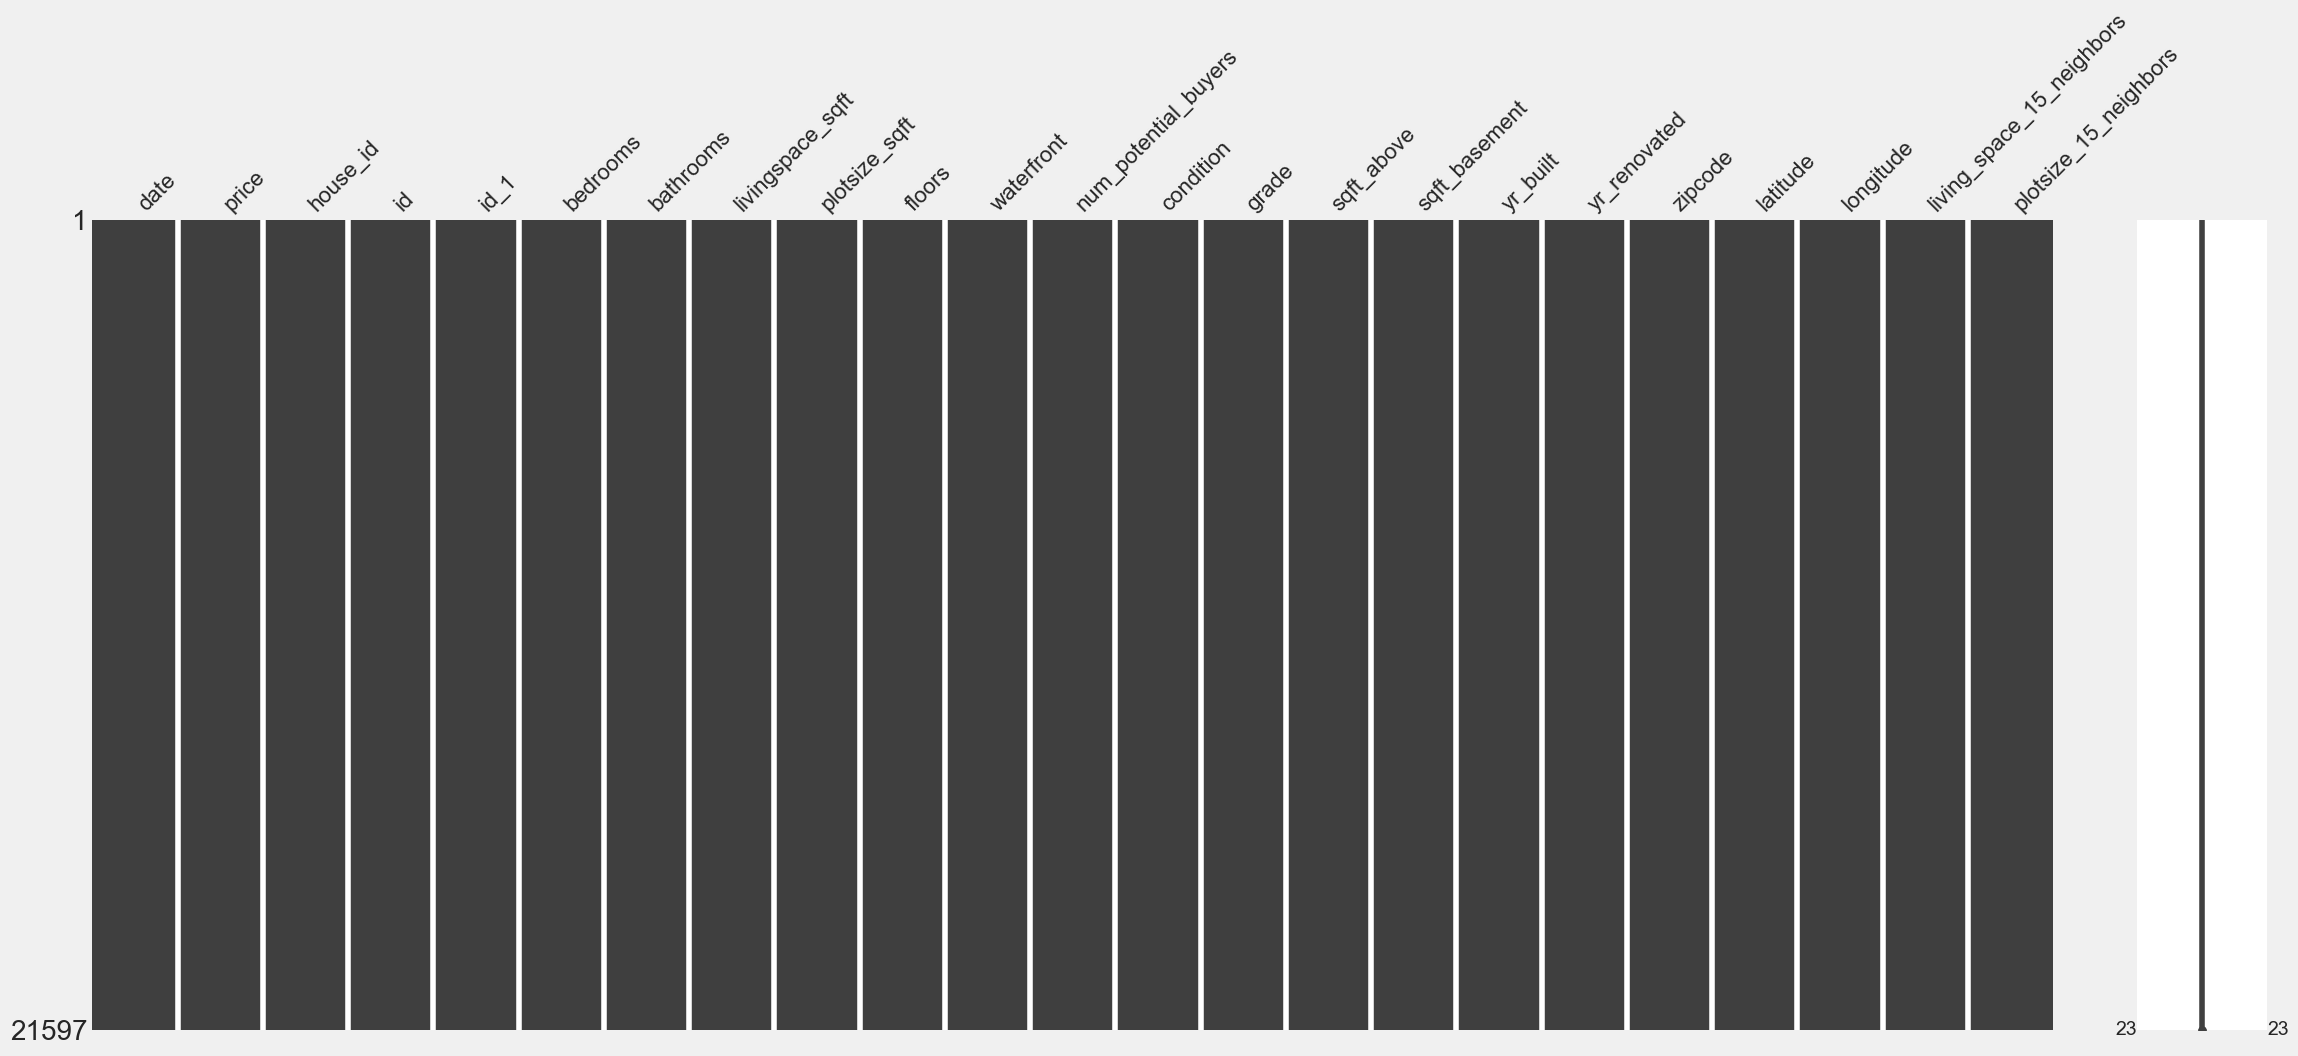

In [351]:
msno.matrix(df_house)

<font size="10">Data visualisation

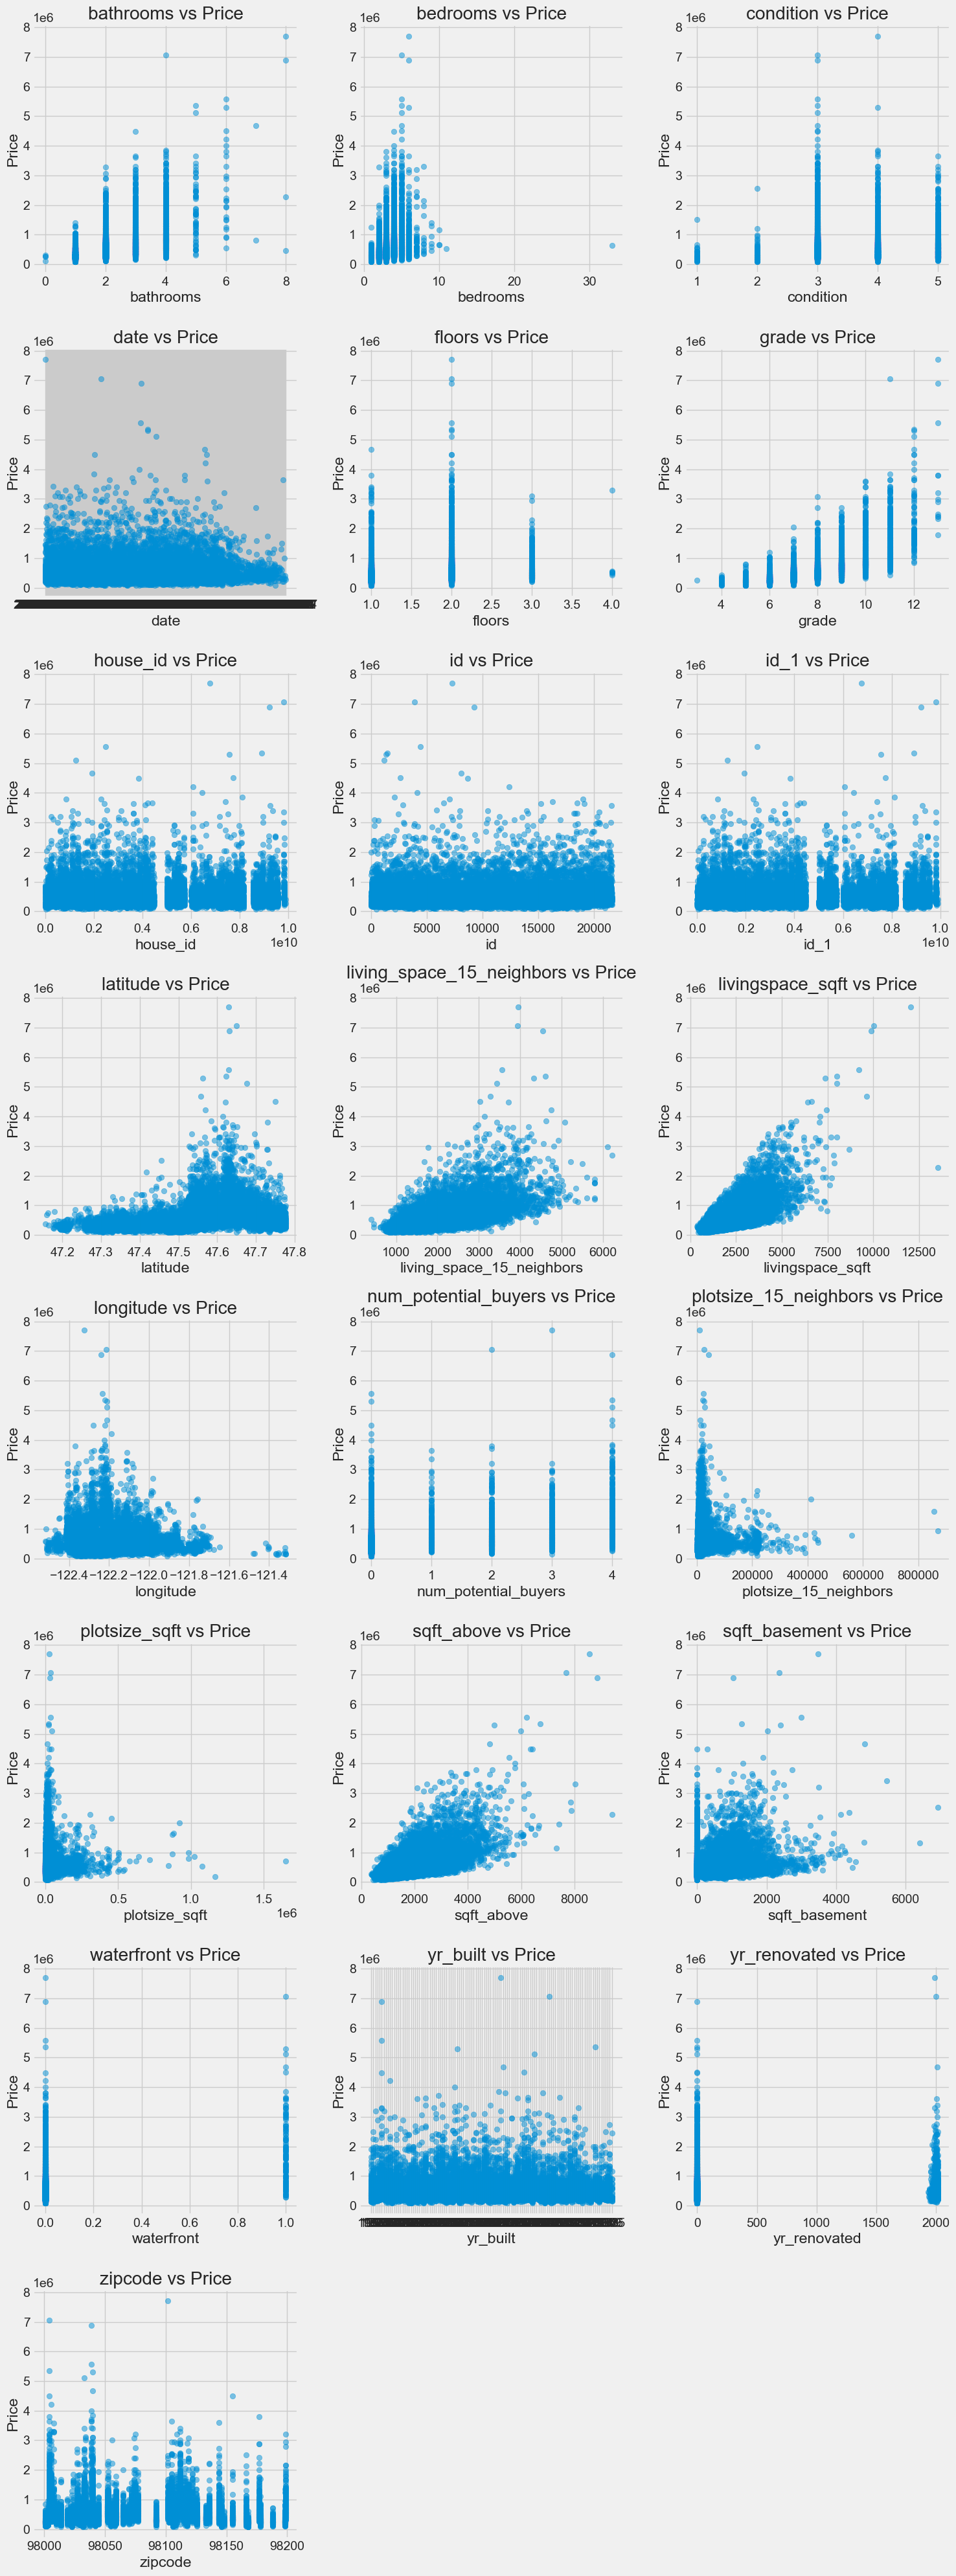

In [355]:
import pandas as pd
import matplotlib.pyplot as plt

# List of columns excluding 'price'
x_columns = df_house.columns.difference(['price'])

# Calculate the number of rows and columns for the subplots
num_plots = len(x_columns)
num_cols = 3  
num_rows = -(-num_plots // num_cols)  

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Plot scatter plots for each column against 'price'
for i, col in enumerate(x_columns):
    ax = axes[i]
    ax.scatter(df_house[col], df_house['price'], alpha=0.5)
    ax.set_xlabel(col)
    ax.set_ylabel('Price')
    ax.set_title(f'{col} vs Price')

# Remove any unused subplots
for i in range(num_plots, num_rows*num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


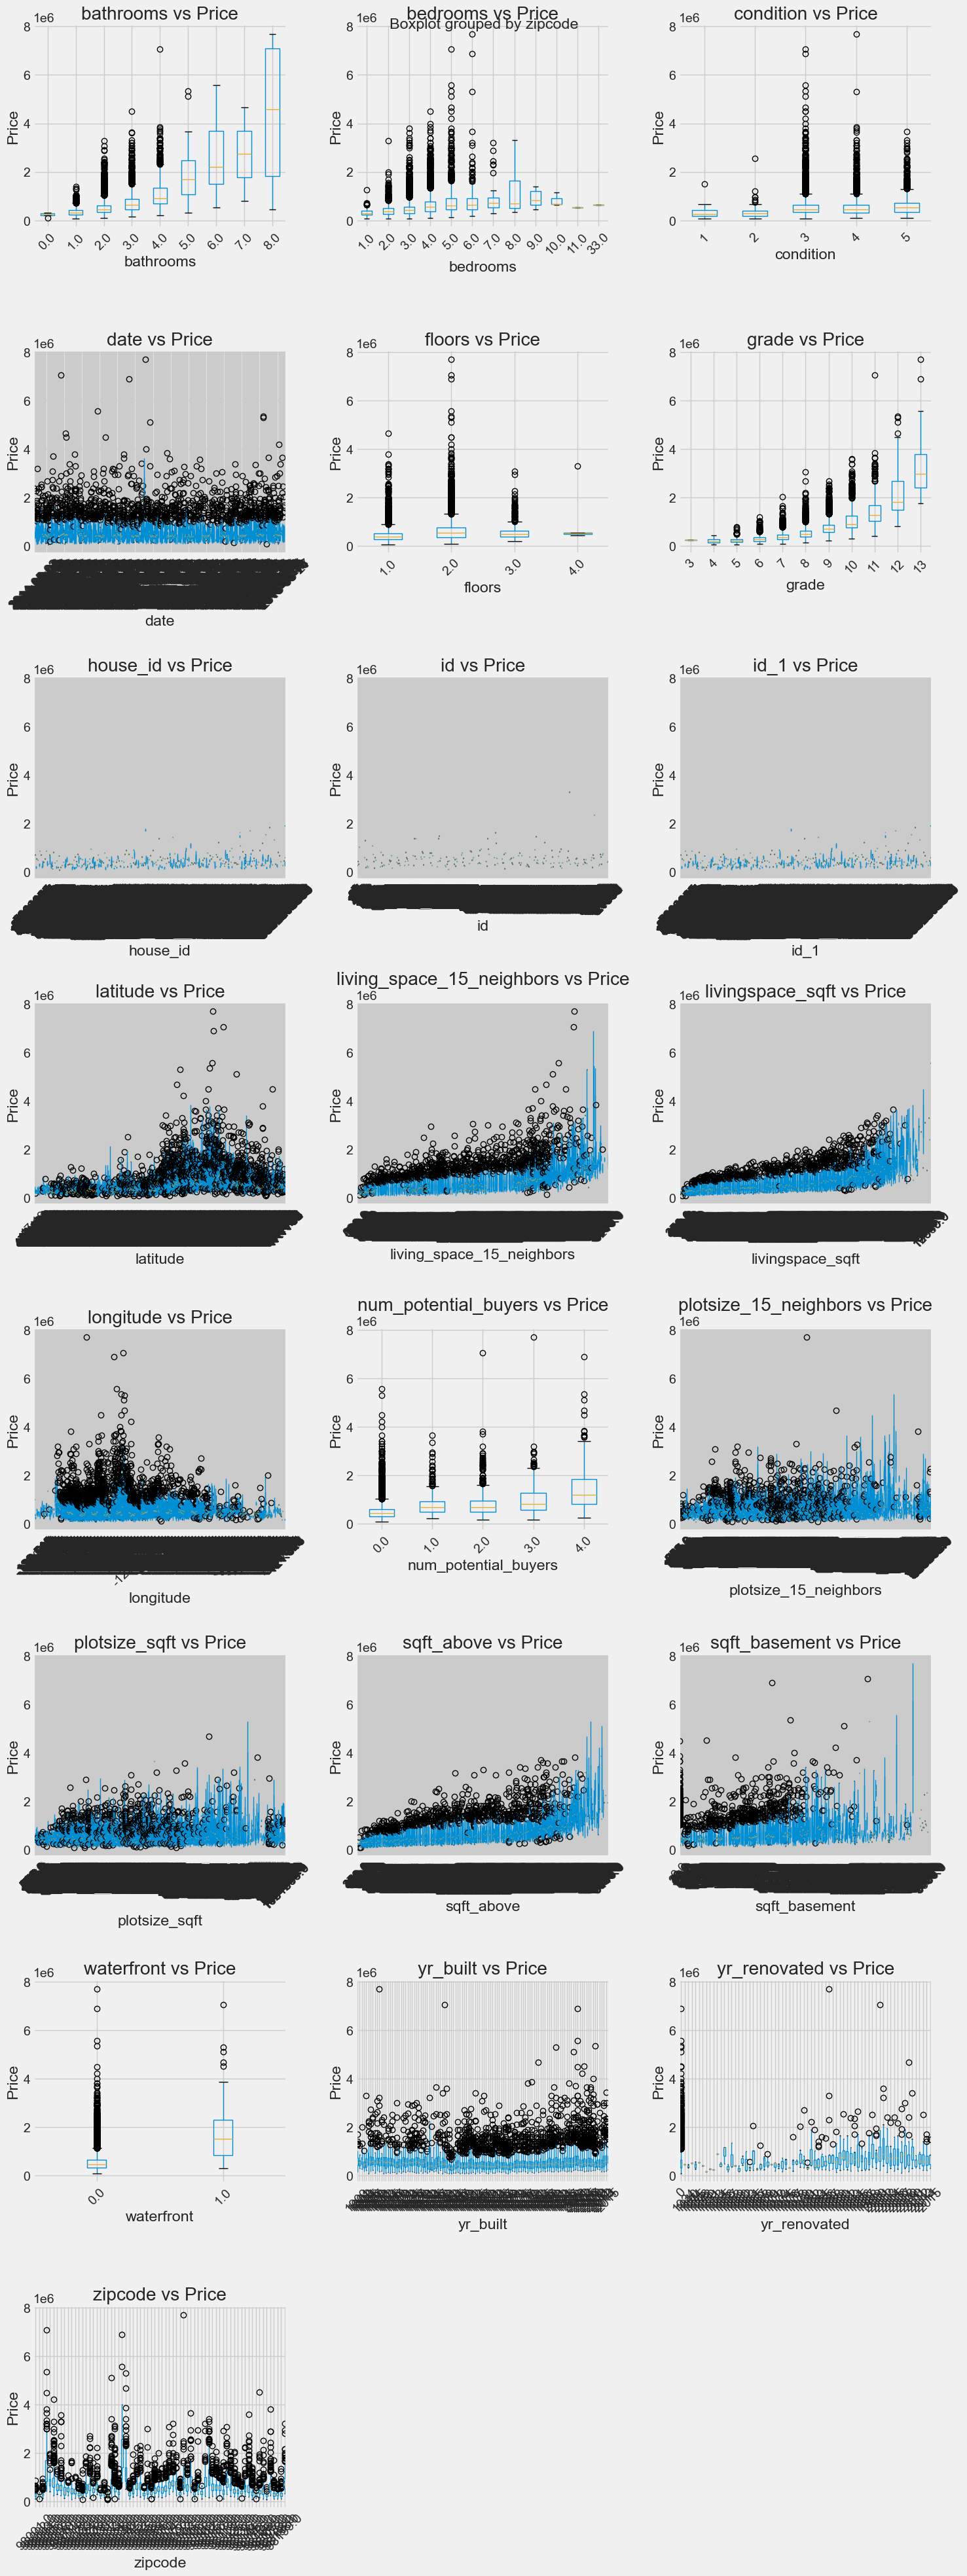

In [356]:
import pandas as pd
import matplotlib.pyplot as plt


# List of columns excluding 'price'
x_columns = df_house.columns.difference(['price'])

# Calculate the number of rows and columns for the subplots
num_plots = len(x_columns)
num_cols = 3  
num_rows = -(-num_plots // num_cols)  

# Create a figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Plot box plots for each column against 'price'
for i, col in enumerate(x_columns):
    ax = axes[i]
    df_house.boxplot(column='price', by=col, ax=ax)
    ax.set_title(f'{col} vs Price')
    ax.set_ylabel('Price')
    ax.set_xlabel(col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  

# Remove any unused subplots
for i in range(num_plots, num_rows*num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()
